In [156]:
import pandas as pd #data import,export,manipulation
import numpy as np # for numerical tasks
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns #multidimensional plot

In [157]:
df=pd.read_csv("Data/hotel_bookings.csv")
df.head()
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


 # Cleaning the Data

In [158]:
df.shape

(119390, 32)

In [159]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [160]:
#not availble data
def data_clean(df):
    df.fillna(0,inplace=True) #zero imputation
    print(df.isnull().sum())

In [161]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [162]:
list_cols=["children","adults","babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [163]:
#clean the data

filtered_data=(df['children']==0) & (df['adults']==0) & (df['babies']==0) #noone came dirty data
final_data=df[~filtered_data] #filter it out ~ used for deletion/negation

In [164]:
final_data.shape

(119210, 32)

# Where do the guest come from?(Spatial Analysis)

In [165]:
country_wise_data=final_data[final_data['is_canceled']==0]['country'].value_counts().reset_index()    #means booking not cancelled

In [166]:
country_wise_data.columns=["Country","No of guests"]
print(country_wise_data)

    Country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     KIR             1
162     ATF             1
163     TJK             1
164     SLE             1
165     FRO             1

[166 rows x 2 columns]


In [167]:
import plotly.express as px

In [168]:
map_guests=px.choropleth(country_wise_data,locations=country_wise_data['Country'],
                         color=country_wise_data["No of guests"],
                         hover_name=country_wise_data['Country'],
                         title="Home country of guests"
                        )

In [169]:
map_guests.show()

# How much do guests pay for a room per night?

In [170]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [171]:
df["adr"]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [172]:
data=final_data[final_data["is_canceled"]==0]

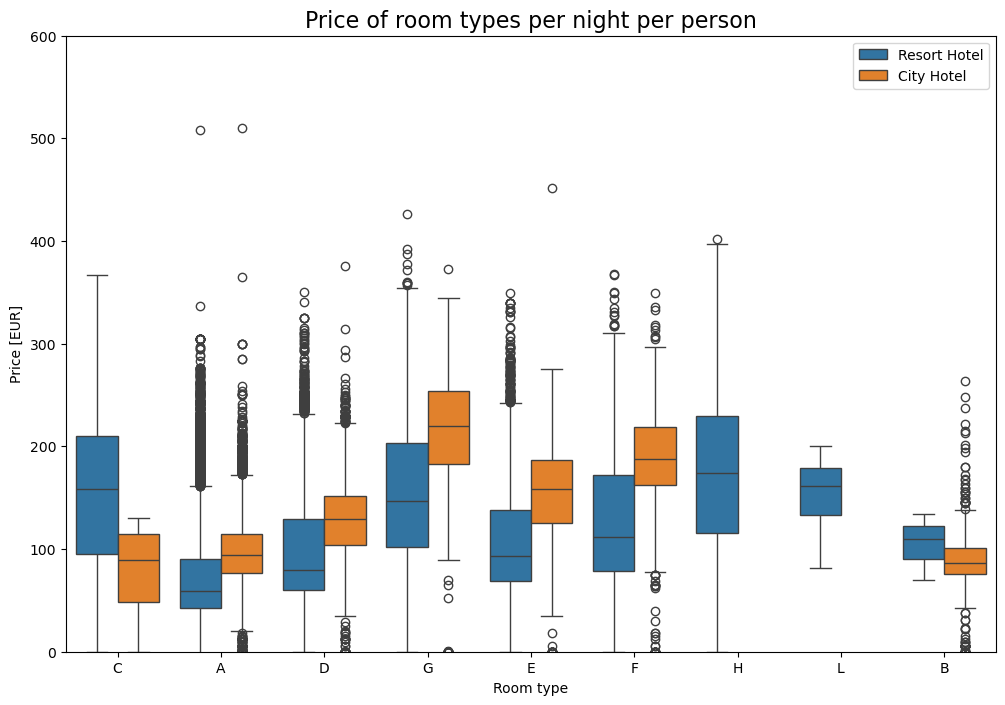

In [173]:
#boxplot
plt.figure(figsize=(12,8)) #default size
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue= "hotel",data=data)
plt.title("Price of room types per night per person",fontsize=16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc="upper right")
plt.ylim(0,600)
plt.show()

# How does the price per night (adr) vary over the year?

In [174]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [175]:
data_resort=final_data[(final_data["hotel"]=="Resort Hotel") & (final_data["is_canceled"]==0)]
data_city=final_data[(final_data["hotel"]=="City Hotel") & (final_data["is_canceled"]==0)]

In [176]:
#resort hotel: variable :data_resort

# adr attribute:

#how many people came to resort hotel per month
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(resort_hotel)

   arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860


In [177]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(city_hotel)

   arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582


In [178]:
final=resort_hotel.merge(city_hotel,on="arrival_date_month")
final.columns=["month","price_for_resort_hotel","price_for_city_hotel"]

In [179]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


# Sort the Month

In [180]:
test=final

In [181]:
from calendar import month_name
def sort_month(df,colname):
    month_dict={j:i for i,j in enumerate(month_name)}    #dictionary comprehension
    df["month_num"]=df[colname].apply(lambda x:month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index','month_num'],axis=1)

In [182]:
sort_month(test,"month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='month'>

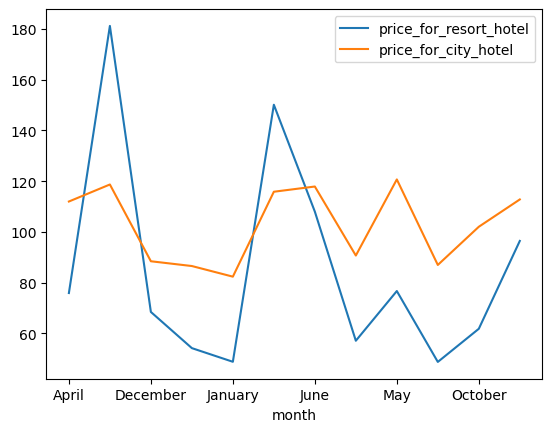

In [183]:
final.plot(kind="line",x="month",y=['price_for_resort_hotel','price_for_city_hotel'])

# Which are the most busy month or in which months guests are more?

In [184]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [185]:
rush_resort=data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["month","no of guests"]
print(rush_resort)

        month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [186]:
rush_city=data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["month","no of guests"]
print(rush_city)

        month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [187]:
#merge two data from rush_resort,rush_city

final_rush=rush_resort.merge(rush_city,on="month")
final_rush.columns=["month","no of guests in resort hotel","no of guests in city hotel"]
final_rush

,month,no of guests in resort hotel,no of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [188]:
final_rush=sort_month(final_rush,"month")
print(final_rush)

        month  no of guests in resort hotel  no of guests in city hotel
0     January                          1866                        2249
1    February                          2308                        3051
2       March                          2571                        4049
3       April                          2550                        4010
4         May                          2535                        4568
5        June                          2037                        4358
6        July                          3137                        4770
7      August                          3257                        5367
8   September                          2102                        4283
9     October                          2575                        4326
10   November                          1975                        2676
11   December                          2014                        2377


<Axes: xlabel='month'>

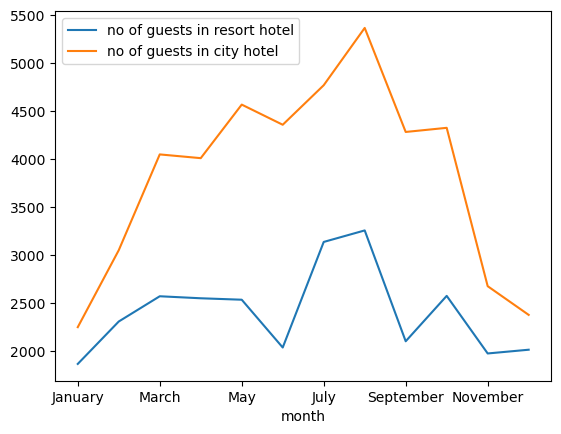

In [189]:
#plot line plot month vs no of guests

final_rush.plot(kind="line",x="month",
                y=["no of guests in resort hotel","no of guests in city hotel"])

# How long do people stay at the hotels?

In [190]:
filter_condition=final_data['is_canceled']==0

clean_data=final_data[filter_condition]

In [191]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [192]:
clean_data['total_nights']=clean_data["stays_in_weekend_nights"]+clean_data["stays_in_week_nights"]

In [193]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [194]:
stay=clean_data.groupby(["total_nights","hotel"]).agg('count').reset_index()
stay=stay.iloc[:,0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [195]:
stay=stay.rename(columns = {'is_canceled':'Number of stays'})

In [196]:
print(stay)

    total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]


<Axes: xlabel='total_nights', ylabel='Number of stays'>

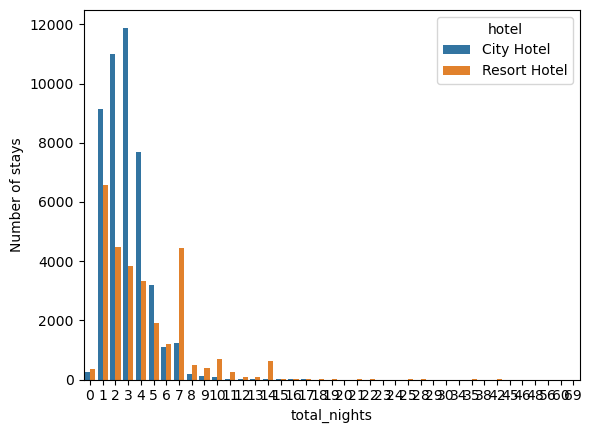

In [197]:
#plot the barplot

sns.barplot(x='total_nights',y="Number of stays",hue="hotel",
            hue_order=["City Hotel","Resort Hotel"],data=stay)

# Select Important Numerical Features using Co-relation

In [198]:
correlation=final_data.corr(numeric_only=True)

In [199]:
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [200]:
correlation=correlation["is_canceled"][1:]

In [201]:
correlation.abs().sort_values(ascending = False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [202]:
list_not=["days_in_waiting_list","arrival_date_year"]

In [319]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]  #numerical one

In [320]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# Select important categorical features

In [236]:
final_data["reservation_status"].value_counts()

reservation_status
Check-Out    75011
Canceled     42993
No-Show       1206
Name: count, dtype: int64

In [237]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [238]:
print(cat_not)

['country', 'reservation_status', 'booking_changes', 'assigned_room_type', 'days_in_waiting_list']


In [239]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

In [240]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [321]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [242]:
data_cat=final_data[cat_features]

In [243]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015  


In [302]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

In [304]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [298]:
data_cat["cancellation"]=final_data["is_canceled"]

In [306]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [307]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [308]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [309]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


# Feature Encoding

# Mean Encoding Technique

In [310]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'cancellation'],
      dtype='object')

In [311]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")
        

In [312]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [313]:
data_cat.drop(["cancellation"],axis=1,inplace=True)

In [314]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

# Preparing our data

In [322]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data


dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe

In [323]:
print(dataframe.head())

   is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  ...  arrival_date_month  \
0       2       0.0       0                  0  ...            0.374644   
1       2       0.0       0                 

# Handle the outliers

In [324]:
dataframe.describe()["adr"]

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<Axes: xlabel='lead_time', ylabel='Density'>

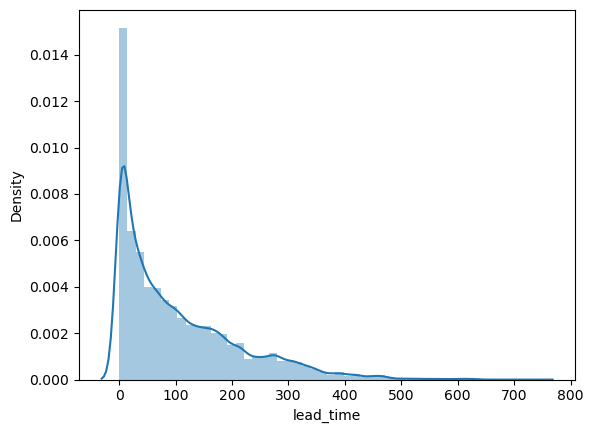

In [325]:
sns.distplot(dataframe["lead_time"])

In [326]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [327]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

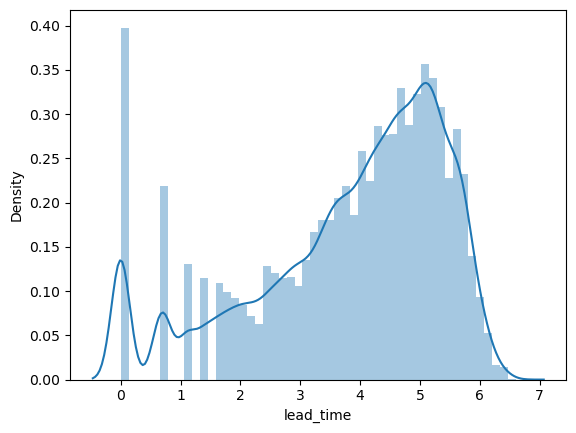

In [328]:
sns.distplot(dataframe["lead_time"].dropna())

<Axes: xlabel='adr', ylabel='Density'>

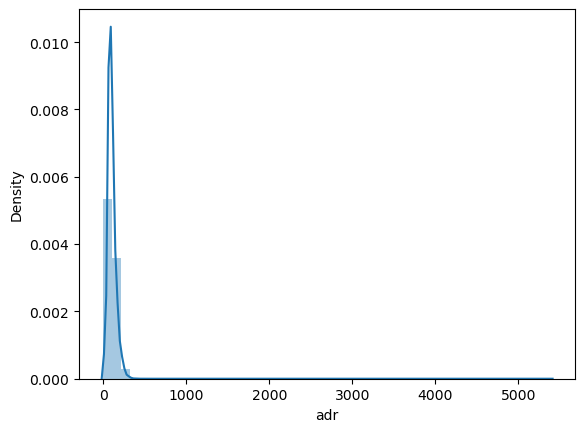

In [329]:
sns.distplot(dataframe["adr"])

In [330]:
handle_outlier("adr")

In [331]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [332]:
dataframe.dropna(inplace=True)

# Feature Importance

In [349]:
##separate dependent and independent variables

y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent


In [350]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [351]:
x.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,5.837730,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,6.603944,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,2.079442,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,2.639057,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,2.708050,27,1,0,2,2,0.0,0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3


In [352]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [337]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [379]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.0045, random_state = 0))

In [380]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.0045, random_state=0))

In [381]:
feature_sel_model.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [382]:
cols=x.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [383]:
selected_feature=cols[(feature_sel_model.get_support())]

In [384]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'stays_in_week_nights',
       'adults', 'children', 'previous_cancellations', 'booking_changes',
       'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [385]:
print(f"Total features {x.shape[1]}")

Total features 28


In [386]:
print(f"Selected features {len(selected_feature)}")

Selected features 15


In [389]:
x=x[selected_feature]

In [390]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'stays_in_week_nights',
       'adults', 'children', 'previous_cancellations', 'booking_changes',
       'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [392]:
x.head()

,lead_time,arrival_date_week_number,stays_in_week_nights,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,0,2,0.0,0,3,0.0,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,0,2,0.0,0,4,0.0,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
3,2.639057,27,1,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
4,2.708050,27,2,2,0.0,0,0,0.0,4.595120,0,1,0.28402,2015,7,3


In [393]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# Splitting the data and building the model

In [395]:
# X -> independent variables

# y -> dependent variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 45)

# Implement logistic regression

In [396]:
from sklearn.linear_model import LogisticRegression

In [397]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train) #training of the model

LogisticRegression()

In [403]:
y_pred= logistic_model.predict(x_test)  #prediction by model

In [404]:
from sklearn.metrics import confusion_matrix

In [405]:
confusion_matrix(y_test,y_pred)

array([[15467,  3215],
       [ 5277,  5844]])

In [406]:
from sklearn.metrics import accuracy_score

In [407]:
accuracy_score(y_test,y_pred)

0.7150622420561689

### Implementing different classification algorithms
### Logistic regression
### Naive Bayes 
### Random Forest
### Decesion trees
### KNN

In [409]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [411]:
models=[]
models.append(("Naive Bayes",GaussianNB()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Decision Trees",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))

In [419]:
for name , model in models:
    print(name)
    model.fit(x_train,y_train)

    #make a prediction
    predictions = model.predict(x_test)

    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions,y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))

    print("\n")

Naive Bayes
[[8799 1274]
 [9883 9847]]
0.6256417139214173


Random Forest
[[18570  1317]
 [  112  9804]]
0.9520518068650807


Decision Trees
[[17875   780]
 [  807 10341]]
0.9467503271482737


KNN
[[18519  1577]
 [  163  9544]]
0.9416166157769352


